In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("Admission_Predict.csv")

In [4]:
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [5]:
df.describe()


Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.340000  
25%      3.000000    8.170000    0.000000          0.640000  
50%      3.500000    8.610000    1.000000          0.730000  
75%      4.000000    9.062500    1.000000          0.830000  
max      5.000000    9.920000    1.000000          0.970000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
import seaborn as sns

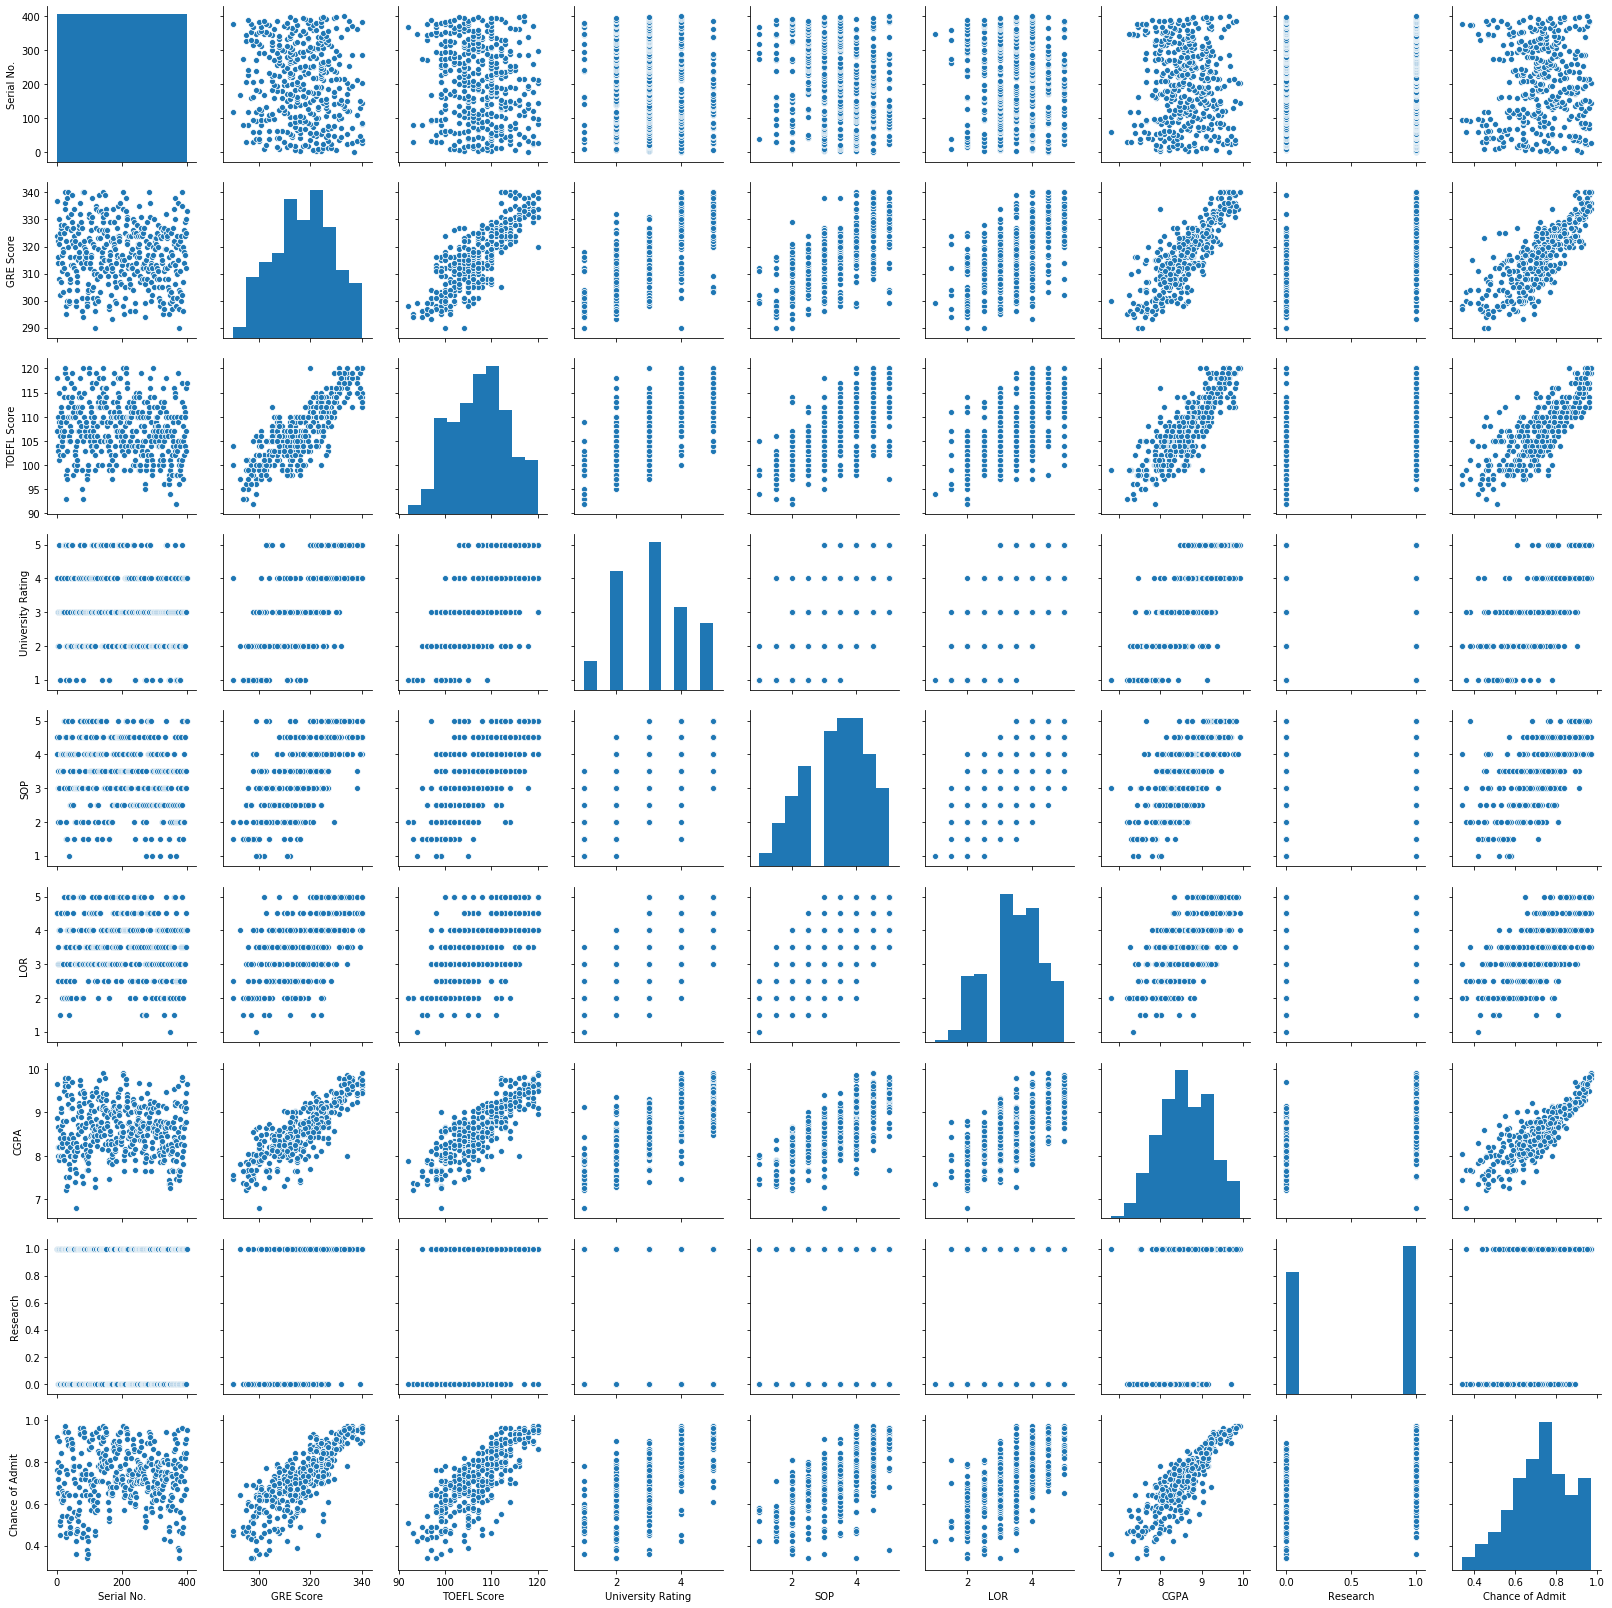

In [8]:
sns.pairplot(df)

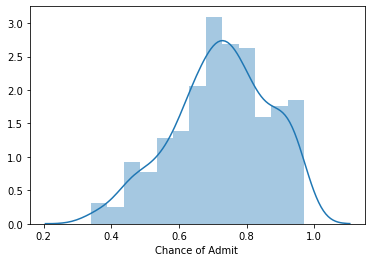

In [9]:
sns.distplot(df['Chance of Admit '])

In [10]:
df.corr()

Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   
Chance of Admit      0.042336   0.802610     0.791594           0.711250   

                        SOP      LOR       CGPA  Research  Chance of Admit   
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138          0.042336  
GRE Score          0.612831  0.557555  0.833060  0.580391          0.802610  
TOEFL Score        0.657981  0.567721  0.828417  0.489858          0.791594  
University Rating  0.734523  0.660123  0.746479  0.447783          0.711250  
SOP                1.000000  0.729593  0.718144  0.444029          0.675732  
LOR                0.729593  1.000000  0.670211  0.396859          0.669889  
CGPA               0.718144  0.670211  1.000000  0.521654          0.873289  
Research           0.444029  0.396859  0.521654  1.000000          0.553202  
Chance of Admit    0.675732  0.669889  0.873289  0.553202          1.000000

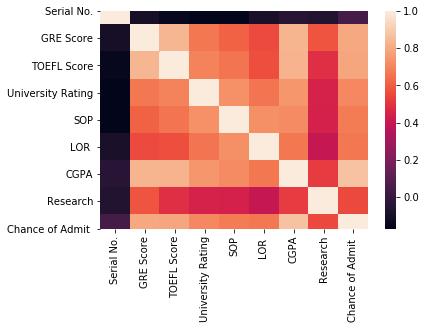

In [11]:
sns.heatmap(df.corr())

In [12]:
col=df.columns
print(col)
col[:-1]

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research'],
      dtype='object')

In [13]:
X=df[['GRE Score','TOEFL Score','SOP','LOR ','Research','CGPA']]
Y=df[col[-1]]

In [14]:
X

GRE Score  TOEFL Score  SOP  LOR   Research  CGPA
0          337          118  4.5   4.5         1  9.65
1          324          107  4.0   4.5         1  8.87
2          316          104  3.0   3.5         1  8.00
3          322          110  3.5   2.5         1  8.67
4          314          103  2.0   3.0         0  8.21
..         ...          ...  ...   ...       ...   ...
395        324          110  3.5   3.5         1  9.04
396        325          107  3.0   3.5         1  9.11
397        330          116  5.0   4.5         1  9.45
398        312          103  3.5   4.0         0  8.78
399        333          117  5.0   4.0         1  9.66

[400 rows x 6 columns]

In [15]:
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [16]:
df

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
0           1              0.92  
1           1              0.76  
2           1              0.72  
3           1              0.80  
4           0              0.65  
..        ...               ...  
395         1              0.82  
396         1              0.84  
397         1              0.91  
398         0              0.67  
399         1              0.95  

[400 rows x 9 columns]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [19]:
X_train


GRE Score  TOEFL Score  SOP  LOR   Research  CGPA
258        326          102  5.0   5.0         1  8.76
177        319          110  3.5   3.5         0  9.04
119        327          104  3.0   3.5         1  8.84
194        316          109  3.5   3.0         0  8.76
229        324          111  3.0   3.0         1  9.01
..         ...          ...  ...   ...       ...   ...
71         336          112  5.0   5.0         1  9.76
106        329          111  4.5   4.5         1  9.18
270        306          105  2.5   3.0         1  8.22
348        302           99  2.0   2.0         0  7.25
102        314          106  4.0   3.5         0  8.25

[268 rows x 6 columns]

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(lr.intercept_)

-1.3459623612692928


In [24]:
lr.coef_

array([0.00205367, 0.00309177, 0.00226528, 0.01623524, 0.01648992,
       0.11839957])

In [25]:
cdf=pd.DataFrame(lr.coef_,X.columns,columns=['coef'])

In [26]:
cdf


coef
GRE Score    0.002054
TOEFL Score  0.003092
SOP          0.002265
LOR          0.016235
Research     0.016490
CGPA         0.118400

In [27]:
prediction=lr.predict(X_test)

In [28]:
prediction


array([0.64450111, 0.72268735, 0.93187605, 0.81971721, 0.57707494,
       0.92645815, 0.52497706, 0.5344451 , 0.66501444, 0.84448473,
       0.72615563, 0.91051596, 0.54775189, 0.88432154, 0.69151053,
       0.68867657, 0.67385271, 0.47863087, 0.68816181, 0.97543143,
       0.59078918, 0.65475977, 0.71222578, 0.53138475, 0.95325235,
       0.81102987, 0.69096623, 0.56500987, 0.68193566, 0.81445345,
       0.81109619, 0.94510835, 0.6470496 , 0.51348571, 0.66725394,
       0.66993511, 0.73069243, 0.64541051, 0.61908031, 0.89241288,
       0.74042849, 0.5968435 , 0.77630263, 0.95967694, 0.84382658,
       0.83450304, 0.95156821, 0.65440293, 0.92007608, 0.85818162,
       0.89000102, 0.72870241, 0.77658936, 0.95105026, 0.5764558 ,
       0.59598752, 0.69578497, 0.8431303 , 0.60106917, 0.84123748,
       0.65713406, 0.65497504, 0.69773401, 0.50413194, 0.63519284,
       0.71724939, 0.61988714, 0.8485007 , 0.85733514, 0.79475882,
       0.72155027, 0.82740352, 0.86854461, 0.82560836, 0.52121

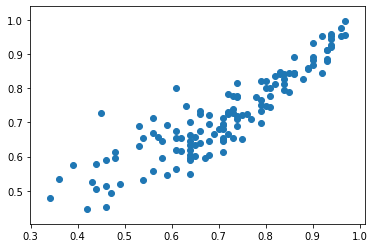

In [29]:
plt.scatter(y_test,prediction)

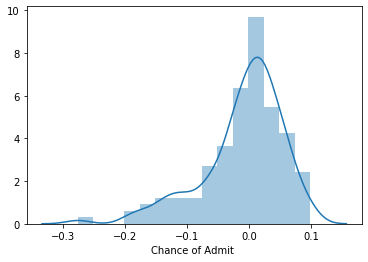

In [30]:
sns.distplot((y_test-prediction))

In [31]:
lr.score(X_test,y_test)

0.8038903874502975

In [32]:
lr.score(X,Y)

0.8002761606552352